In [1]:
# Importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# Loading the data from the local file boston_train

train = np.loadtxt("./boston_train.csv",delimiter=",")
x = train[:,:-1]
y = train[:,-1]
x.shape

(379, 13)

In [3]:
# Initializing scaling object

min_max_scaler_object = preprocessing.MinMaxScaler()

In [4]:
min_max_scaler_object.fit(x)
x = min_max_scaler_object.transform(x)

In [5]:
def predict(x,w,b):
    return np.dot(x,w) + b

In [6]:
def cost(x,w,b,y):
    return np.sum((y-(np.dot(x,w) + b))**2)/len(x)

In [7]:
def substep_gd(learning_rate,x,y,w,b):
    y_hat = predict(x,w,b)
    w = w + x*(learning_rate*(y-y_hat))
    b = b + learning_rate*(y-y_hat)
    return w,b

In [8]:
def step_gd(learning_rate,x,y,w,b):
    for i in range(len(x)):
        w,b = substep_gd(learning_rate,x[i],y[i],w,b)
    return w,b

In [9]:
def gd(learning_rate,num_iteration,x,y):
    w = np.ones(len(x[0]))
    b = 1
    co = np.array([])
    iteration = np.array([])
    for i in range(num_iteration):
        w,b = step_gd(learning_rate,x,y,w,b)
        c = cost(x,w,b,y)
        co = np.append(co,c)
        iteration =  np.append(iteration,i)
    return w,b,co,iteration

In [10]:
def run():
    learning_rate = 0.001
    num_iteration = 720
    w,b,co,iteration = gd(learning_rate,num_iteration,x,y)
    return w,b,co,iteration

In [11]:
# Loading test data

test = np.loadtxt("boston_test.csv",delimiter=",")
test = min_max_scaler_object.transform(test)

In [12]:
# Running the gradient algorithm and predicting results
w,b,cost,iteration = run()
test_results = predict(test,w,b)

In [13]:
# Saving the results in diabetes_results file

np.savetxt("boston_results.csv",test_results,delimiter=",",fmt='%1.5f')

In [14]:
test_results

array([11.66744602, 29.29823325, 22.23668134, 24.27395642, 20.39907661,
        2.8800143 , 29.46821953, 24.18397928, 18.53014688, 22.90684006,
       24.29849241, 18.01147846, 18.40351257, 21.81226489, 43.45304703,
       23.62090115, 24.21572008, 27.01882718, 20.00679751, 31.18222057,
       23.46604605, 24.53865635, 33.85495138, 35.67994682, 32.02764799,
       16.10100674, 22.311972  , 31.93168603, 24.89054703, 33.53932772,
       17.27821247, 25.57933369, 23.53736876, 25.6770843 , 15.79376836,
       28.8708216 , 25.87238604, 20.2555316 , 24.51363854,  9.65784431,
        7.22669662, 28.42155242, 29.09913524, 20.49775087, 20.66599348,
        2.42232404, 40.41458923, 25.96922813, 30.87201823, 17.61932145,
       18.03183008, 40.42387901, 18.42166956, 20.26364658, 16.113841  ,
       21.33138004, 18.43200243, 22.56907208, 13.7313373 , 17.82964126,
       15.03175456, 29.18150697, 24.53825645, 25.54308534, 17.16279532,
       16.09299409, 34.42711653, 17.52503044, 26.54826751, 22.72

In [15]:
w

array([ -7.31851898,   2.27531639,   0.50364973,   3.13583988,
        -7.04140904,  21.39767683,   0.81860333, -11.30082908,
         5.60511524,  -4.60749335,  -8.9342776 ,   3.45525064,
       -19.93675964])

(23.5, 24.0)

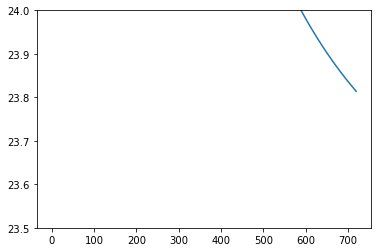

In [16]:
plt.plot(iteration,cost)
plt.ylim(23.5,24)

In [17]:
cost

array([130.02747796, 104.77511046,  93.76187287,  85.53529564,
        79.043275  ,  73.87053939,  69.71374234,  66.34008396,
        63.5711214 ,  61.27025402,  59.33292402,  57.67906617,
        56.24732696,  54.99064768,  53.8728915 ,  52.86626824,
        51.94936824,  51.10566105,  50.32234913,  49.58949238,
        48.89933947,  48.24581711,  47.62413976,  47.03051139,
        46.46189754,  45.91585093,  45.39037812,  44.88383741,
        44.39486067,  43.92229338,  43.46514865,  43.02257192,
        42.59381379,  42.17820905,  41.77516054,  41.38412662,
        41.00461145,  40.63615744,  40.27833924,  39.93075916,
        39.59304341,  39.26483918,  38.94581224,  38.63564506,
        38.33403517,  38.04069391,  37.7553453 ,  37.47772513,
        37.20758013,  36.94466733,  36.6887534 ,  36.43961413,
        36.19703394,  35.96080544,  35.73072904,  35.50661255,
        35.28827087,  35.07552564,  34.86820497,  34.66614315,
        34.46918038,  34.27716252,  34.08994087,  33.90

In [18]:
test_results

array([11.66744602, 29.29823325, 22.23668134, 24.27395642, 20.39907661,
        2.8800143 , 29.46821953, 24.18397928, 18.53014688, 22.90684006,
       24.29849241, 18.01147846, 18.40351257, 21.81226489, 43.45304703,
       23.62090115, 24.21572008, 27.01882718, 20.00679751, 31.18222057,
       23.46604605, 24.53865635, 33.85495138, 35.67994682, 32.02764799,
       16.10100674, 22.311972  , 31.93168603, 24.89054703, 33.53932772,
       17.27821247, 25.57933369, 23.53736876, 25.6770843 , 15.79376836,
       28.8708216 , 25.87238604, 20.2555316 , 24.51363854,  9.65784431,
        7.22669662, 28.42155242, 29.09913524, 20.49775087, 20.66599348,
        2.42232404, 40.41458923, 25.96922813, 30.87201823, 17.61932145,
       18.03183008, 40.42387901, 18.42166956, 20.26364658, 16.113841  ,
       21.33138004, 18.43200243, 22.56907208, 13.7313373 , 17.82964126,
       15.03175456, 29.18150697, 24.53825645, 25.54308534, 17.16279532,
       16.09299409, 34.42711653, 17.52503044, 26.54826751, 22.72

In [19]:
np.where(cost == np.amin(cost))

(array([719], dtype=int64),)

In [20]:
np.amin(cost)

23.813936697034446